In [1]:
import numpy as np
import xarray as xr
import crocosi.gridop as gop


%matplotlib inline
from matplotlib import pyplot as plt

from itertools import permutations

In [2]:
#from dask.distributed import Client, LocalCluster
#cluster = LocalCluster()
#client = Client(cluster)
#client

In [3]:
# generate synthetic data
dims = {'time':3, 'z':5, 'y':20, 'x':10}
vmap = {'time':0., 'z':1., 'y':0., 'x':0.}

In [4]:
def get_ds(p):

    _coords = {d: np.arange(dims[d]) for d in p}
    _coords.update(z_target1d=np.arange(.5,6))
    ds = xr.Dataset(coords=_coords)

    ds['v'] = sum([ds[d]*vmap[d] for d in p])
    ds['z_v'] = ds['z'] + 0.*ds['v']
    # the line above necessarily imposes a dimension order which may vary
    # should loop around all potential dimension order for zv

    ds['z_target'] = ds['z_target1d']
    # need to vary number of dimensions and their order on the line above
    return ds

In [13]:
ndim = 3
P = [p for p in list(permutations(dims.keys(),ndim)) if 'z' in p]
#for p in P
# ...
P

[('time', 'z', 'y'),
 ('time', 'z', 'x'),
 ('time', 'y', 'z'),
 ('time', 'x', 'z'),
 ('z', 'time', 'y'),
 ('z', 'time', 'x'),
 ('z', 'y', 'time'),
 ('z', 'y', 'x'),
 ('z', 'x', 'time'),
 ('z', 'x', 'y'),
 ('y', 'time', 'z'),
 ('y', 'z', 'time'),
 ('y', 'z', 'x'),
 ('y', 'x', 'z'),
 ('x', 'time', 'z'),
 ('x', 'z', 'time'),
 ('x', 'z', 'y'),
 ('x', 'y', 'z')]

In [14]:
ds = get_ds(P[6]) # ndim 3
#ds = get_ds(P[2]) # ndim 2
ds

<xarray.Dataset>
Dimensions:     (time: 3, y: 20, z: 5, z_target1d: 6)
Coordinates:
  * z           (z) int64 0 1 2 3 4
  * y           (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * time        (time) int64 0 1 2
  * z_target1d  (z_target1d) float64 0.5 1.5 2.5 3.5 4.5 5.5
Data variables:
    v           (z, y, time) float64 0.0 0.0 0.0 0.0 0.0 ... 4.0 4.0 4.0 4.0 4.0
    z_v         (z, y, time) float64 0.0 0.0 0.0 0.0 0.0 ... 4.0 4.0 4.0 4.0 4.0
    z_target    (z_target1d) float64 0.5 1.5 2.5 3.5 4.5 5.5

[[0.5 0.5 0.5]
 [1.5 1.5 1.5]
 [2.5 2.5 2.5]
 [3.5 3.5 3.5]
 [nan nan nan]
 [nan nan nan]]


ValueError: x and y can be no greater than 2-D, but have shapes (6,) and (6, 20, 3)

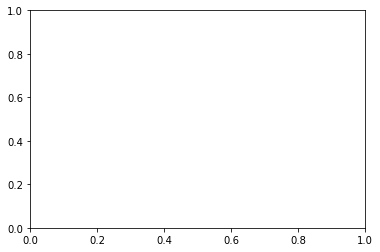

In [15]:
out = gop.interp2z_np_3d(ds['z_target'].values, 
                      ds['v'].values, 
                      (0.*ds['v']+ds['z_v']).values,
                      b_extrap=0, t_extrap=0)
print(out[:,0])
hdl = plt.plot(ds['z_target'].values, out)
plt.grid()

[0.5 1.5 2.5 3.5 4.5 5.5]


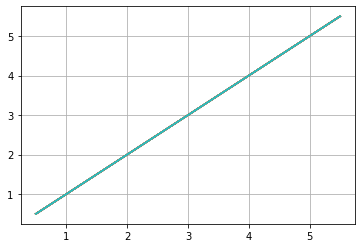

In [10]:
out = gop.interp2z_3d(ds['z_target'].values, 
                      ds['v'].values, 
                      (0.*ds['v']+ds['z_v']).values,
                      b_extrap=0, t_extrap=2)
print(out[:,0])
hdl = plt.plot(ds['z_target'].values, out)
plt.grid()

In [5]:
gop.interp2z(ds['z_target'], ds['v'], ds['z_v'])

ValueError: applied function returned data with unexpected number of dimensions: 3 vs 4, for dimensions ('z_target1d', 'time', 'x', 'z')

In [8]:
x = np.array([[1], [2], [3]])
y = np.array([4, 5, 6])
a,b = np.broadcast_arrays(x,y)

In [10]:
x.shape

(3, 1)

In [9]:
y.shape

(3,)

In [9]:
x.shape

(3, 1)

In [8]:
y.shape

(3,)

In [17]:
a.shape==b.shape

True

In [19]:
a.shape[1:]

(3,)